In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

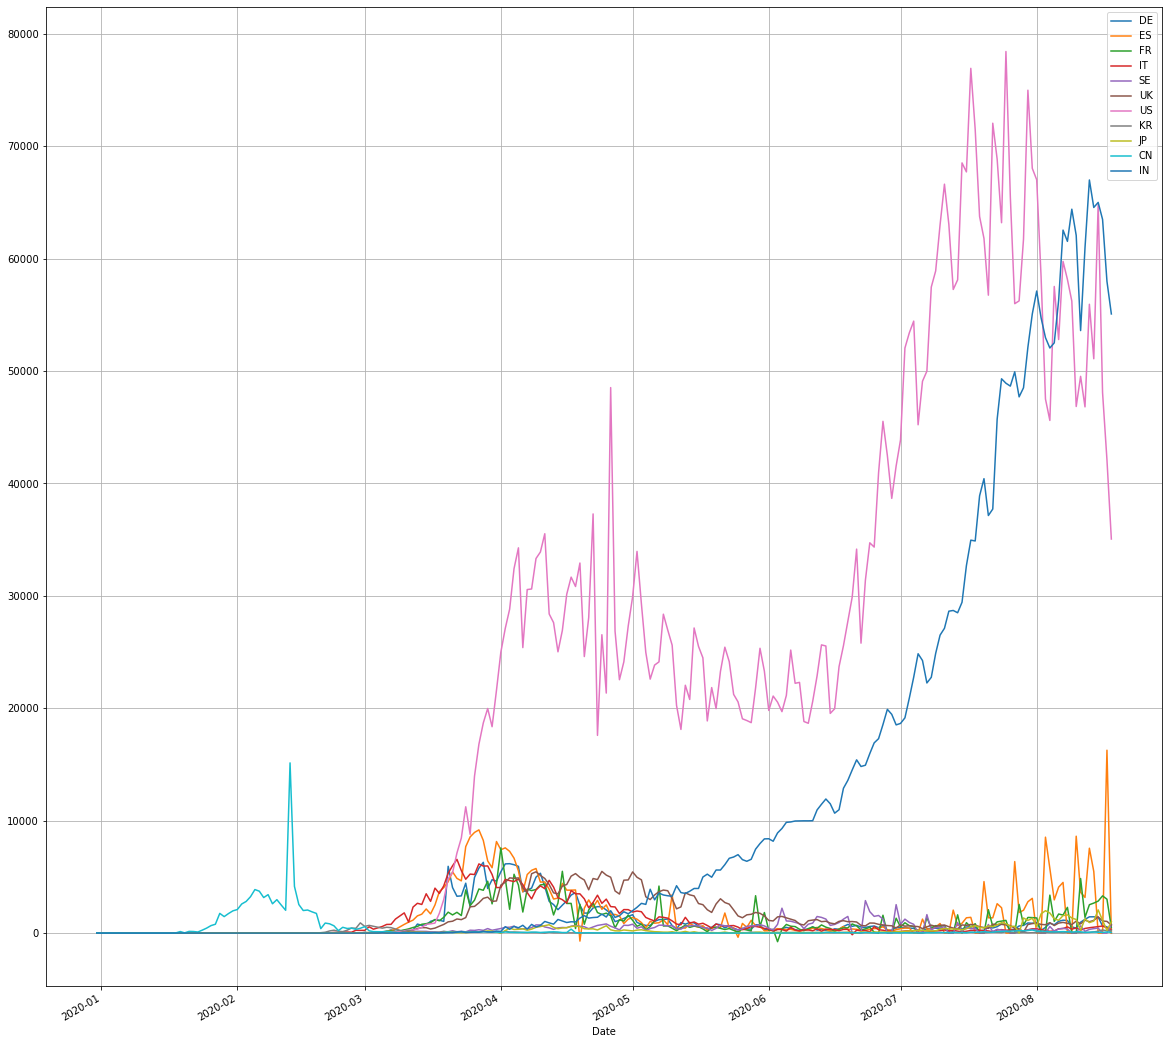

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

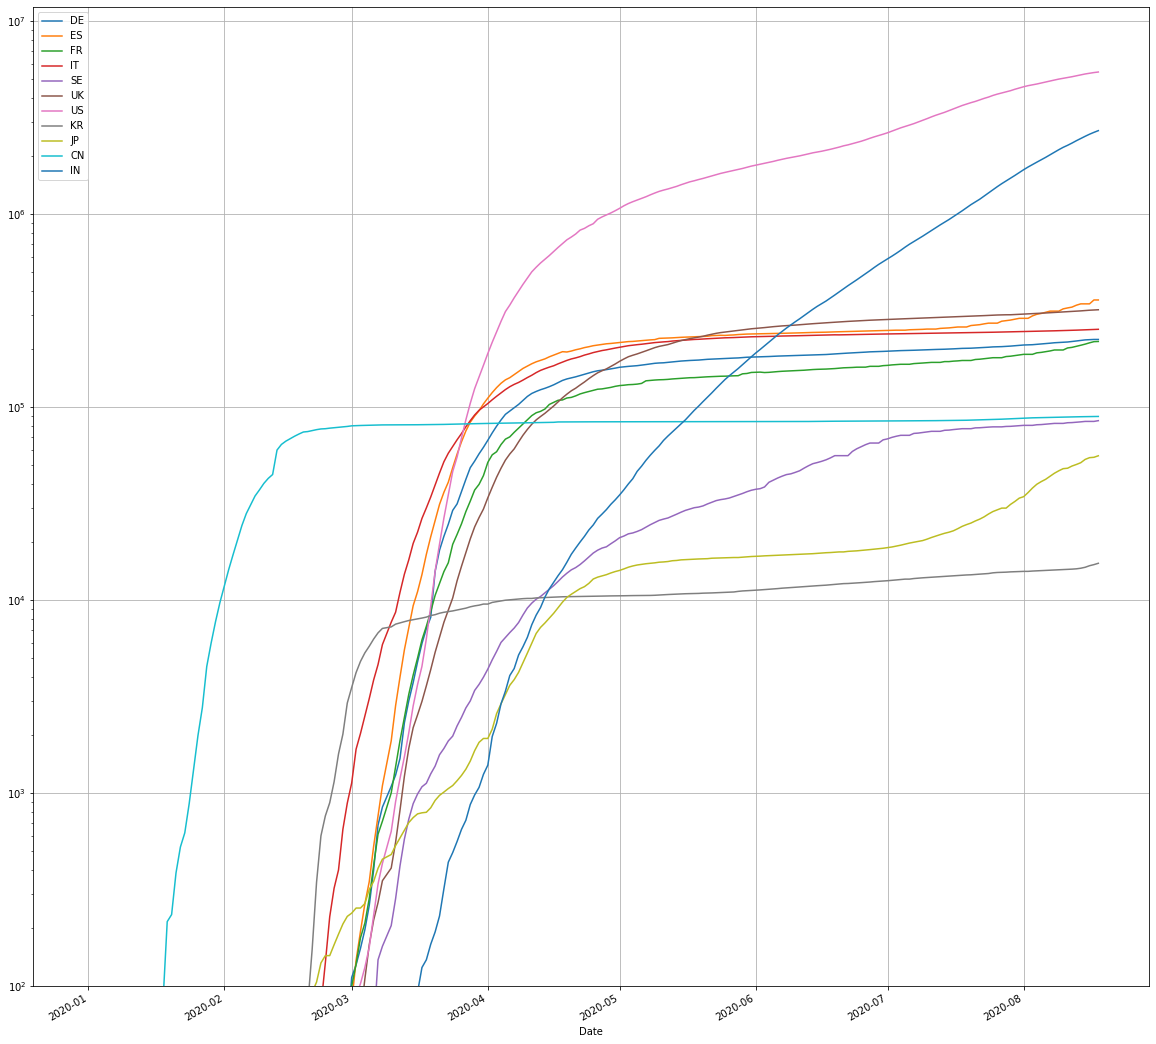

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

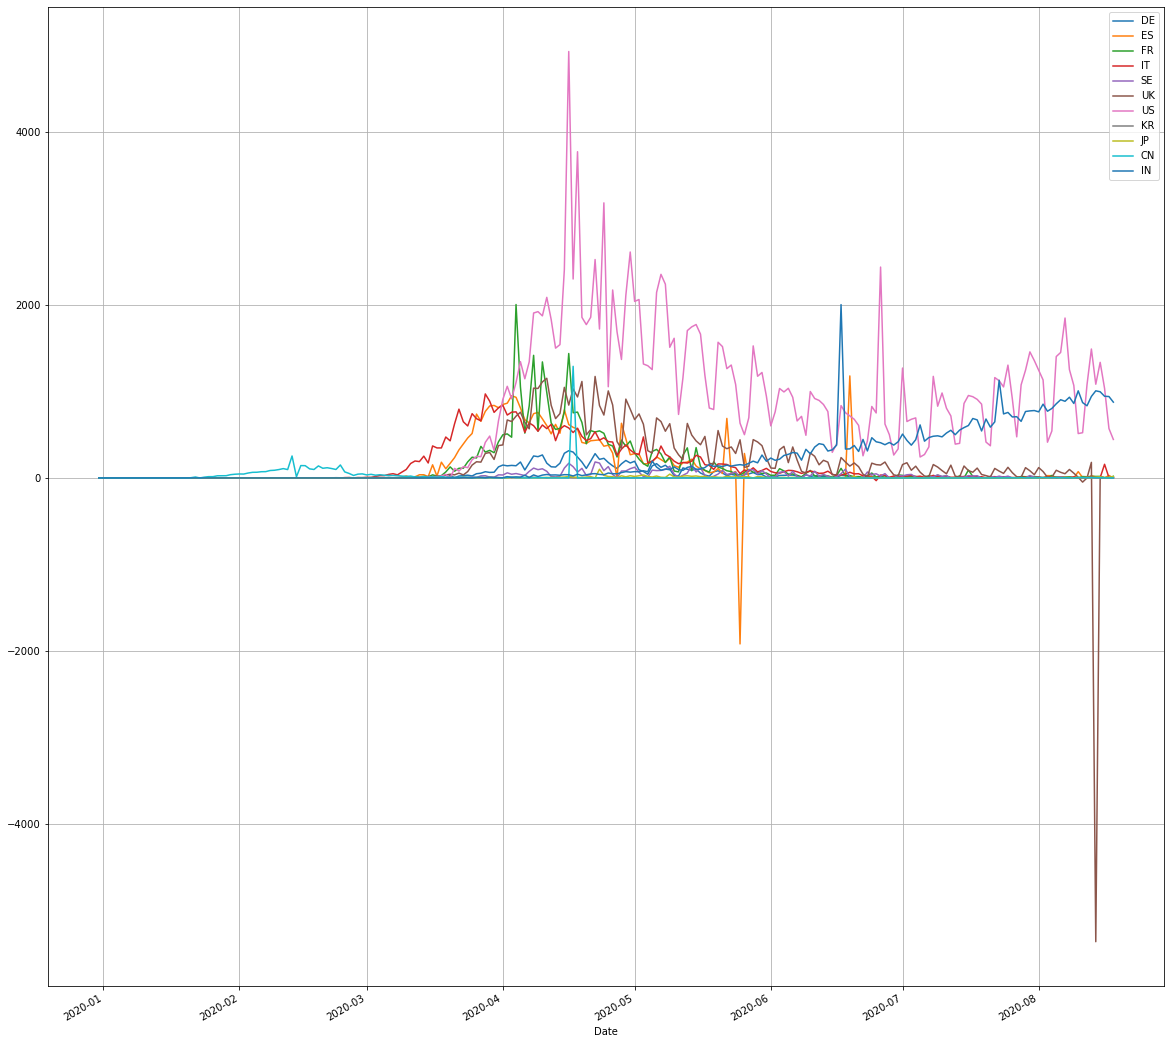

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

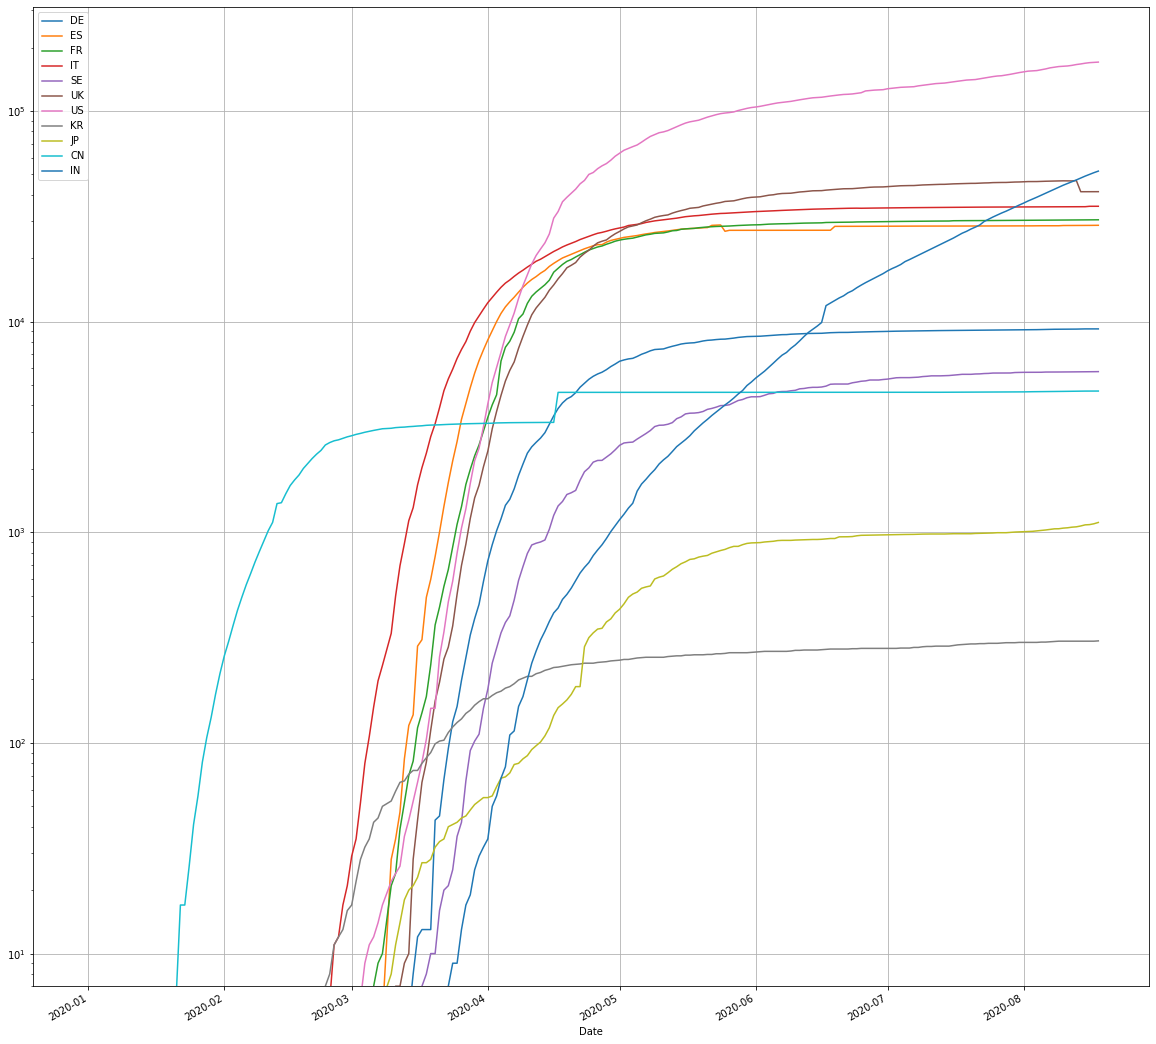

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-08-04,879.0,5760.0,3376,159,590,928,45607,34,1786,114,52050
12,2020-08-05,741.0,2953.0,1039,190,169,670,57525,33,1271,107,52509
11,2020-08-06,1045.0,4088.0,1695,384,359,891,52804,43,1134,122,56282
10,2020-08-07,1147.0,4507.0,1604,401,427,950,59755,20,1552,132,62538
9,2020-08-08,1122.0,0.0,2288,552,356,871,58150,43,1624,120,61537
8,2020-08-09,555.0,0.0,0,347,0,758,56221,36,1344,92,64399
7,2020-08-10,436.0,8618.0,0,463,0,1062,46847,28,1207,121,62064
6,2020-08-11,966.0,3632.0,4854,259,649,816,49530,34,248,113,53601
5,2020-08-12,1226.0,3172.0,1397,412,154,1148,46813,54,1274,58,60963
4,2020-08-13,1445.0,7550.0,2524,476,329,1009,55941,56,932,81,66999


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-08-04,211226.0,302381.0,190885.0,246737.0,80970.0,305563.0,4713441.0,14175.0,39825.0,88054.0,1855745.0
2020-08-05,211967.0,305334.0,191924.0,246927.0,81139.0,306233.0,4770966.0,14208.0,41096.0,88161.0,1908254.0
2020-08-06,213012.0,309422.0,193619.0,247311.0,81498.0,307124.0,4823770.0,14251.0,42230.0,88283.0,1964536.0
2020-08-07,214159.0,313929.0,195223.0,247712.0,81925.0,308074.0,4883525.0,14271.0,43782.0,88415.0,2027074.0
2020-08-08,215281.0,313929.0,197511.0,248264.0,82281.0,308945.0,4941675.0,14314.0,45406.0,88535.0,2088611.0
2020-08-09,215836.0,313929.0,197511.0,248611.0,82281.0,309703.0,4997896.0,14350.0,46750.0,88627.0,2153010.0
2020-08-10,216272.0,322547.0,197511.0,249074.0,82281.0,310765.0,5044743.0,14378.0,47957.0,88748.0,2215074.0
2020-08-11,217238.0,326179.0,202365.0,249333.0,82930.0,311581.0,5094273.0,14412.0,48205.0,88861.0,2268675.0
2020-08-12,218464.0,329351.0,203762.0,249745.0,83084.0,312729.0,5141086.0,14466.0,49479.0,88919.0,2329638.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-08-04,8.0,26.0,29,12,1,9,543,0,5,3,803
12,2020-08-05,12.0,1.0,2,5,3,89,1403,1,6,4,857
11,2020-08-06,7.0,1.0,9,10,13,65,1450,0,4,1,904
10,2020-08-07,8.0,3.0,7,6,3,49,1848,1,7,3,886
9,2020-08-08,12.0,0.0,12,3,0,98,1252,1,6,1,933
8,2020-08-09,1.0,0.0,0,13,0,55,1069,1,1,0,861
7,2020-08-10,1.0,73.0,0,2,0,8,513,0,7,5,1007
6,2020-08-11,4.0,5.0,16,4,3,-48,523,0,4,4,871
5,2020-08-12,6.0,-2.0,14,6,4,0,1076,0,7,3,834
4,2020-08-13,4.0,26.0,17,10,4,180,1490,0,4,4,942


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-08-04,9156.0,28498.0,30285.0,35033.0,5744.0,46210.0,155399.0,300.0,1015.0,4649.0,38938.0
2020-08-05,9168.0,28499.0,30287.0,35038.0,5747.0,46299.0,156802.0,301.0,1021.0,4653.0,39795.0
2020-08-06,9175.0,28500.0,30296.0,35048.0,5760.0,46364.0,158252.0,301.0,1025.0,4654.0,40699.0
2020-08-07,9183.0,28503.0,30303.0,35054.0,5763.0,46413.0,160100.0,302.0,1032.0,4657.0,41585.0
2020-08-08,9195.0,28503.0,30315.0,35057.0,5763.0,46511.0,161352.0,303.0,1038.0,4658.0,42518.0
2020-08-09,9196.0,28503.0,30315.0,35070.0,5763.0,46566.0,162421.0,304.0,1039.0,4658.0,43379.0
2020-08-10,9197.0,28576.0,30315.0,35072.0,5763.0,46574.0,162934.0,304.0,1046.0,4663.0,44386.0
2020-08-11,9201.0,28581.0,30331.0,35076.0,5766.0,46526.0,163457.0,304.0,1050.0,4667.0,45257.0
2020-08-12,9207.0,28579.0,30345.0,35082.0,5770.0,46526.0,164533.0,304.0,1057.0,4670.0,46091.0
